In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ARDL

In [136]:
df = pd.read_excel("dataset_inf.xlsx")
df["Date"] = df["Date"].dt.strftime("%Y-%d-%m %H:%M:%S")
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,HICP,HICPenergy,EURIBOR3,output
0,2000-01-01,74.86,58.24,3.3431,92.1
1,2000-02-01,75.10,58.89,3.5368,93.2
2,2000-03-01,75.37,60.30,3.7470,93.6
3,2000-04-01,75.45,59.61,3.9253,94.7
4,2000-05-01,75.54,60.36,4.3620,96.0
...,...,...,...,...,...
273,2022-10-01,121.03,171.75,1.4277,107.1
274,2022-11-01,120.95,168.53,1.8252,108.6
275,2022-12-01,120.52,157.40,2.0663,107.2
276,2023-01-01,120.27,158.32,2.3449,107.9


## Question 1)

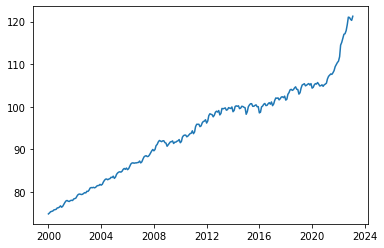

In [48]:
plt.plot(df["Date"], df["HICP"])
plt.show()

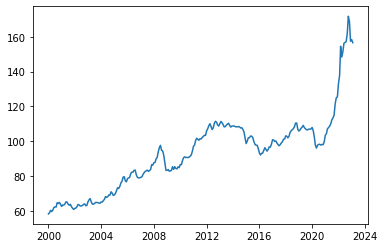

In [49]:
plt.plot(df["Date"], df["HICPenergy"])
plt.show()

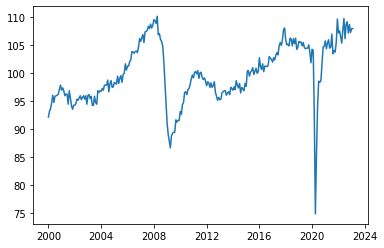

In [51]:
plt.plot(df["Date"], df["output"])
plt.show()

## Question 2)

- ACF and PACF plots

In [55]:
def plot_acf_pacf(df_ts, lags=12):
    plot_acf(df_ts, lags=lags)
    plot_pacf(df_ts, lags=lags, method="ols")


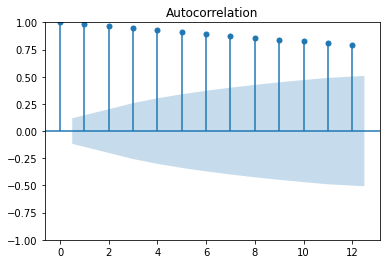

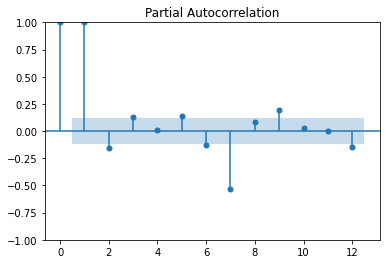

In [59]:
plot_acf_pacf(df["HICP"])

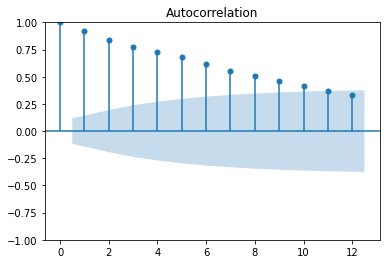

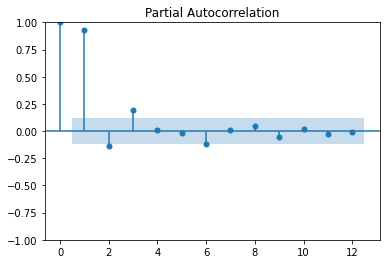

In [60]:
plot_acf_pacf(df["output"])

## Question 3)

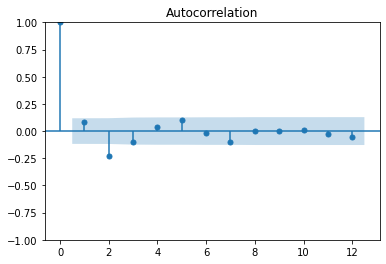

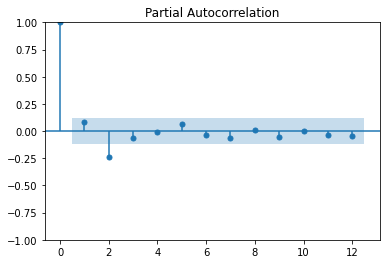

In [70]:
plot_acf_pacf(np.log(df["output"]).diff(1).values[1:])

In [154]:
def adf_test(timeseries, regression_option):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, regression=regression_option, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput.apply(lambda x: round(x, 4)))

- Testing for the "output" variable

In [155]:
#ts = np.log(df["output"]).diff(1).values[1:]
ts = np.log(df["output"])

print(adf_test(timeseries=ts,regression_option='c'), "\n")
print(adf_test(timeseries=ts,regression_option='ct'))

Results of Dickey-Fuller Test:
Test Statistic                  -2.9819
p-value                          0.0366
#Lags Used                       2.0000
Number of Observations Used    275.0000
Critical Value (1%)             -3.4544
Critical Value (5%)             -2.8721
Critical Value (10%)            -2.5724
dtype: float64
None 

Results of Dickey-Fuller Test:
Test Statistic                  -3.3873
p-value                          0.0531
#Lags Used                       2.0000
Number of Observations Used    275.0000
Critical Value (1%)             -3.9921
Critical Value (5%)             -3.4266
Critical Value (10%)            -3.1365
dtype: float64
None


In [157]:
#ts = df["HICP"]
ts = np.log(df["HICP"])

print(adf_test(timeseries=ts,regression_option='c'), "\n")
print(adf_test(timeseries=ts,regression_option='ct'))


Results of Dickey-Fuller Test:
Test Statistic                   0.7426
p-value                          0.9907
#Lags Used                      16.0000
Number of Observations Used    261.0000
Critical Value (1%)             -3.4557
Critical Value (5%)             -2.8727
Critical Value (10%)            -2.5727
dtype: float64
None 

Results of Dickey-Fuller Test:
Test Statistic                  -2.0272
p-value                          0.5866
#Lags Used                      16.0000
Number of Observations Used    261.0000
Critical Value (1%)             -3.9939
Critical Value (5%)             -3.4274
Critical Value (10%)            -3.1370
dtype: float64
None


In [111]:
ts = df["HICPenergy"]
print(adf_test(timeseries=ts,regression_option='ct',max_n_lags=1), "\n")

print(adf_test(timeseries=ts,regression_option='c',max_n_lags=1))

Results of Dickey-Fuller Test:
Test Statistic                  -1.0066
p-value                          0.9432
#Lags Used                       1.0000
Number of Observations Used    276.0000
Critical Value (1%)             -3.9920
Critical Value (5%)             -3.4265
Critical Value (10%)            -3.1365
dtype: float64
None 

Results of Dickey-Fuller Test:
Test Statistic                   0.5400
p-value                          0.9860
#Lags Used                       1.0000
Number of Observations Used    276.0000
Critical Value (1%)             -3.4543
Critical Value (5%)             -2.8721
Critical Value (10%)            -2.5724
dtype: float64
None


## Question 4)

In [140]:
df["log_output"] = np.log(df["output"])
df["log_HICP"] = np.log(df["HICP"])
df["log_HICPenergy"] = np.log(df["HICPenergy"])

df["d_log_output"] = np.log(df["output"]).diff(1)
df["d_log_HICP"] = np.log(df["HICP"]).diff(1)
df["d_log_HICPenergy"] = np.log(df["HICPenergy"]).diff(1)

In [148]:
# Setting the exogenous variables
df_first_model = df.dropna()

exog=df_first_model.loc[:, ['d_log_output', 'd_log_HICPenergy']]
exog_lags={"d_log_output": 2, "d_log_HICPenergy": 1}

model = ARDL(df_first_model.log_HICP, 1, exog, exog_lags)
results = model.fit()

/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [149]:
print(results.summary())

                              ARDL Model Results                              
Dep. Variable:               log_HICP   No. Observations:                  277
Model:                  ARDL(1, 2, 1)   Log Likelihood                1124.418
Method:               Conditional MLE   S.D. of innovations              0.004
Date:                Wed, 12 Apr 2023   AIC                          -2232.836
Time:                        19:28:50   BIC                          -2203.873
Sample:                             2   HQIC                         -2221.214
                                  277                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0014      0.010     -0.141      0.888      -0.021       0.019
log_HICP.L1             1.0006      0.002    448.536      0.000       0.996       1.005
d_log_output.L0 

## Question 5)

Still have to elaborate the long-run multipliers

## Question 6)

In [175]:
# Setting the exogenous variables
df_second_model = df.dropna()

exog=df_second_model.loc[:, ['log_output', 'log_HICPenergy']]
exog_lags={"log_output": 2, "log_HICPenergy": 1}

model = ARDL(df_second_model.log_HICP, 1, exog, exog_lags)
results = model.fit()
print(results.summary())

                              ARDL Model Results                              
Dep. Variable:               log_HICP   No. Observations:                  277
Model:                  ARDL(1, 2, 1)   Log Likelihood                1121.800
Method:               Conditional MLE   S.D. of innovations              0.004
Date:                Wed, 12 Apr 2023   AIC                          -2227.600
Time:                        20:36:12   BIC                          -2198.637
Sample:                             2   HQIC                         -2215.978
                                  277                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0284      0.032      0.900      0.369      -0.034       0.091
log_HICP.L1           0.9794      0.008    119.811      0.000       0.963       0.996
log_output.L0        -0.

/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [153]:
# Setting the exogenous variables
df_third_model = df.dropna()

exog=df_second_model.loc[:, ['log_output', 'log_HICPenergy']]
exog_lags={"log_output": 2, "log_HICPenergy": 2}

model = ARDL(df_third_model.log_HICP, 2, exog, exog_lags)
results = model.fit()
print(results.summary())

                              ARDL Model Results                              
Dep. Variable:               log_HICP   No. Observations:                  277
Model:                  ARDL(2, 2, 2)   Log Likelihood                1120.277
Method:               Conditional MLE   S.D. of innovations              0.004
Date:                Wed, 12 Apr 2023   AIC                          -2220.554
Time:                        19:33:18   BIC                          -2184.386
Sample:                             2   HQIC                         -2206.039
                                  277                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0289      0.031      0.920      0.358      -0.033       0.091
log_HICP.L1           0.9655      0.061     15.765      0.000       0.845       1.086
log_HICP.L2           0.

/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


- So, the second model is better than the third model because of the AIC

## Question 7)

Let's estimate the ECM model. First, we have to test for cointegration, then, we run the ARDL and save the residuals, that will be used as a independent variable in our model (still have to run everything!)

In [159]:
# Test for cointegration
coint_result = sm.tsa.stattools.coint(df_second_model["d_log_HICP"], df_second_model["log_HICPenergy"], trend='c')
if coint_result[1] < 0.05:
    print('Cointegration detected')

In [160]:
coint_result[1]

0.2705448061380451

In [176]:
df_second_model

,Date,HICP,HICPenergy,EURIBOR3,output,log_output,log_HICP,log_HICPenergy,d_log_output,d_log_HICP,d_log_HICPenergy
1,2000-02-01,75.10,58.89,3.5368,93.2,4.534748,4.318821,4.075671,0.011873,0.003201,0.011099
2,2000-03-01,75.37,60.30,3.7470,93.6,4.539030,4.322409,4.099332,0.004283,0.003589,0.023661
3,2000-04-01,75.45,59.61,3.9253,94.7,4.550714,4.323470,4.087823,0.011684,0.001061,-0.011509
4,2000-05-01,75.54,60.36,4.3620,96.0,4.564348,4.324662,4.100327,0.013634,0.001192,0.012503
5,2000-06-01,75.80,61.91,4.5017,94.7,4.550714,4.328098,4.125682,-0.013634,0.003436,0.025355
...,...,...,...,...,...,...,...,...,...,...,...
273,2022-10-01,121.03,171.75,1.4277,107.1,4.673763,4.796038,5.146040,-0.018502,0.014732,0.060235
274,2022-11-01,120.95,168.53,1.8252,108.6,4.687671,4.795377,5.127114,0.013908,-0.000661,-0.018926
275,2022-12-01,120.52,157.40,2.0663,107.2,4.674696,4.791816,5.058790,-0.012975,-0.003562,-0.068323
276,2023-01-01,120.27,158.32,2.3449,107.9,4.681205,4.789739,5.064618,0.006509,-0.002076,0.005828


In [162]:
from statsmodels.formula.api import ols

In [163]:
df_second_model.columns

Index(['Date', 'HICP', 'HICPenergy', 'EURIBOR3', 'output', 'log_output',
       'log_HICP', 'log_HICPenergy', 'd_log_output', 'd_log_HICP',
       'd_log_HICPenergy'],
      dtype='object')

In [ ]:
# Add a constant to the independent variable
X = sm.add_constant(df_second_model[
    [
        'd_log_HICPenergy', 'log_output'
    ] 
])
y = df_second_model['d_log_HICP']

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC0')

In [ ]:
# Add a constant to the independent variable
X = sm.add_constant(df_second_model[
    [
        'd_log_HICPenergy', 'log_output'
    ] 
])
y = df_second_model['d_log_HICP']

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC0')

# Print the summary of the model
# print(model.summary())

# Now, with the residuals to put the error correction model
df_second_model['uhat_1'] = model.resid.diff(1)
X = sm.add_constant(df_second_model[
    [
        'd_log_HICPenergy', 'log_output', 'uhat_1'
    ]
].dropna())

y = df_second_model['d_log_HICP'].dropna()

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC0')

# Print the summary of the model
print(model.summary())

In [171]:
df_second_model['uhat_1'] = model.resid.diff(1)
df_second_model

/var/folders/_q/2vy34m9j2dx56pxmrs4dfp_80000gn/T/ipykernel_33834/1545094672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_second_model['uhat_1'] = model.resid.diff(1)


,Date,HICP,HICPenergy,EURIBOR3,output,log_output,log_HICP,log_HICPenergy,d_log_output,d_log_HICP,d_log_HICPenergy,uhat_1
1,2000-02-01,75.10,58.89,3.5368,93.2,4.534748,4.318821,4.075671,0.011873,0.003201,0.011099,NaN
2,2000-03-01,75.37,60.30,3.7470,93.6,4.539030,4.322409,4.099332,0.004283,0.003589,0.023661,-0.000942
3,2000-04-01,75.45,59.61,3.9253,94.7,4.550714,4.323470,4.087823,0.011684,0.001061,-0.011509,0.001127
4,2000-05-01,75.54,60.36,4.3620,96.0,4.564348,4.324662,4.100327,0.013634,0.001192,0.012503,-0.002425
5,2000-06-01,75.80,61.91,4.5017,94.7,4.550714,4.328098,4.125682,-0.013634,0.003436,0.025355,0.000935
...,...,...,...,...,...,...,...,...,...,...,...,...
273,2022-10-01,121.03,171.75,1.4277,107.1,4.673763,4.796038,5.146040,-0.018502,0.014732,0.060235,-0.000432
274,2022-11-01,120.95,168.53,1.8252,108.6,4.687671,4.795377,5.127114,0.013908,-0.000661,-0.018926,-0.007131
275,2022-12-01,120.52,157.40,2.0663,107.2,4.674696,4.791816,5.058790,-0.012975,-0.003562,-0.068323,0.002317
276,2023-01-01,120.27,158.32,2.3449,107.9,4.681205,4.789739,5.064618,0.006509,-0.002076,0.005828,-0.006310


In [167]:
model.resid.diff(1).dropna()

2     -0.000942
3      0.001127
4     -0.002425
5      0.000935
6     -0.000511
         ...   
273   -0.000432
274   -0.007131
275    0.002317
276   -0.006310
277    0.011900
Length: 276, dtype: float64